# Hypergraph Visualization

Plot hyperedges as sets of connecting nodes. Inspired by PaohVis and UpSet, but with a few differences, mainly out hypergraph is a 2-dimensional set.

**Note:** For an alternative visualization using graph networks see [notebooks/archived/7 Plot Hypergraphs.ipynb](notebooks/archived/7%20Plot%20Hypergraphs.ipynb).

In [1]:
%reload_ext autoreload
%autoreload 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [229]:
data = pd.read_csv('models/gpt3/hypergraph.csv', dtype='category')

data['edge'] = 1.0
adj = data.pivot(columns='construct', values='edge', index='task')
adj.fillna(0, inplace=True)

adj = adj[adj.sum().sort_values(ascending=False).index]
# adj = adj.loc[adj.sum(axis=1).sort_values(ascending=False).index]

g = sns.clustermap(adj, figsize=(15,15))
clustered_cols = g.data2d.columns
plt.close()
adj = adj[clustered_cols]

tasks_idx, constructs_idx = np.where(adj == 1.0)

In [230]:
tasks = adj.index.unique()
constructs = adj.columns.unique()

n_tasks = len(tasks) # y
n_constructs = len(constructs) # y

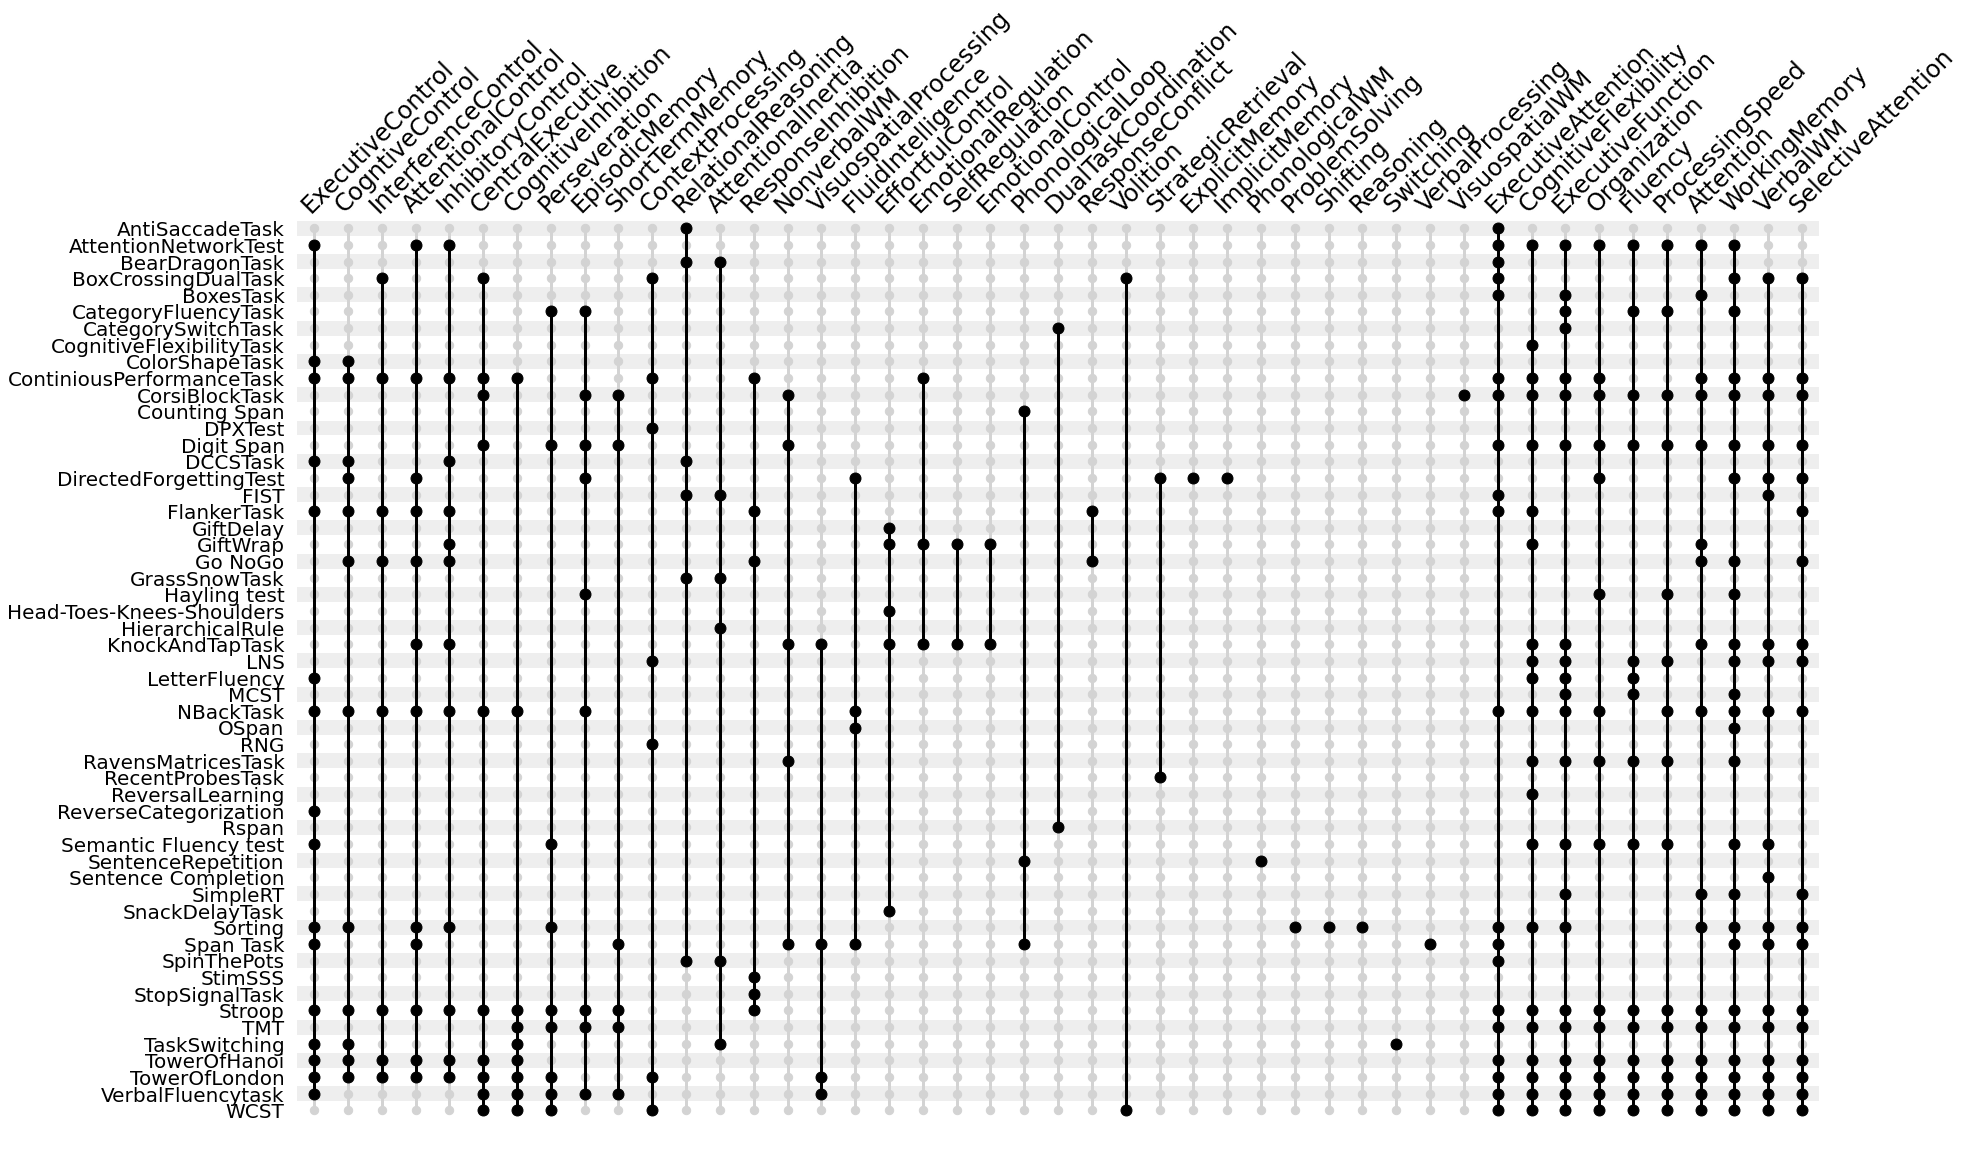

In [270]:
grid = np.mgrid.__getitem__([slice(0, n_constructs, 1), slice(0, n_tasks, 1)]).reshape(2,-1).T
grid_df = pd.DataFrame(grid, columns=['construct','task'])

fig, ax = plt.subplots(figsize=(n_constructs / 1.5, n_tasks / 3))

# background dots 
ax.scatter(grid_df['construct'], grid_df['task'], s=70, color='lightgray', zorder=1)

# background lines
for xi in range(n_constructs):
    ax.plot([xi,xi], [0,n_tasks-1], color='lightgray', lw=3, zorder=2)

# black dots
ax.scatter(constructs_idx, tasks_idx, color='black', s=120, zorder=3)


# black lines
for _construct in range(n_constructs):
    idx = np.where(constructs_idx==_construct)
    _task = tasks_idx[idx]
    ax.plot([_construct, _construct], [_task.min(),_task.max()],
            lw=3, color='black', zorder=4)

# shading
for i in range(0, n_tasks, 2):
    rect = plt.Rectangle((-.5, i-.45), n_constructs, .9, facecolor='#eeeeee', lw=0, zorder=0)
    ax.add_patch(rect)

# reorder axes and clean the frame
ax.xaxis.tick_top()
ax.invert_yaxis()
ax.set_frame_on(False)
ax.tick_params(axis='both', which='both',length=0)

# ticks
plt.xticks(range(n_constructs))
plt.yticks(range(n_tasks))

# tick label properties
[t.set_y(.955) for t in ax.xaxis.get_ticklabels()]
[t.set_x(0.04) for t in ax.yaxis.get_ticklabels()]

# tick labels
def clean_label(label: str):
    if '_-' in label:
        label = label.split('_-')[0]
    else:
        label = label.replace('_',' ')

    if 'WorkingMemory' in label and label != 'WorkingMemory':
        label = label.replace('WorkingMemory', 'WM')

    label = label.replace('DimensionalChangeCardSort', 'DCCS')
    label = label.replace('Verbal fluency ', 'VerbalFluency')
    label = label.removesuffix(' task')

    return label

ax.set_xticklabels([clean_label(l) for l in constructs], fontsize=24)
ax.set_yticklabels([clean_label(l) for l in tasks], fontsize=20)

# rotate x-tick labels
plt.xticks(rotation=45, ha='left', rotation_mode='anchor')

plt.savefig('docs/cogsci2022/figure-2.v2.png', dpi=120, bbox_inches='tight')
plt.show()

In [245]:
# TODO highlight identical tasks and constructs

# for coli in adj.columns:
#     for colj in adj.columns:
#         if colj != coli and np.all(adj[coli] == adj[colj]):
#             print(coli, colj)

# for idx_i in adj.index:
#     for idx_j in adj.index:
#         if idx_i != idx_j and np.all(adj.loc[idx_i] == adj.loc[idx_j]):
#             print(idx_i, idx_j)
